# PHÂN TÍCH DỮ LIỆU, ĐẶT VÀ TRẢ LỜI CÂU HỎI

### Câu hỏi: Những studio sản xuất được nhiều phim có đánh giá cao có đặc điểm gì?

**Lợi ích:**
- Rất nhiều chương trình mà ai đó có xu hướng thích hoặc có điểm số tốt đều đến từ cùng một studio, do đó ta nên xem xét chúng.
- Bắt đầu bằng cách lọc để chỉ xem các hãng phim anime hàng đầu (các studio sản xuất được nhiều bộ phim có `Rank` cao).
- Trả lời câu hỏi này sẽ giúp những người đang tìm kiếm những bộ phim anime chất lượng để xem có thêm gợi ý để tìm kiếm dựa trên các studio hàng đầu.
- Trả lời câu hỏi này sẽ giúp chúng ta biết được đặc điểm của những studio thành công và khác biệt của họ trong ngành. 

**Các bước thực hiện:**
- Split và Explode cột `Studios` để mỗi hàng chỉ có một giá trị của Studio.
- Lọc ra 15 studio sản xuất nhiều anime trong top 1000 anime có đánh giá (`Rank`) cao nhất.
- Phân tích biểu đồ thể hiện tỉ lệ anime top đầu của các studio. 
- Phân tích biểu đồ phân bố các dạng (`Type`) phim theo từng studio.
- Phân tích biểu đồ phân bố các nguồn tài liệu sản xuất (`Source`) theo từng studio.
- Phân tích biểu đồ thể hiện tổng số anime đã sản xuất và số điểm trung bình của mỗi studio.
- Phân tích biểu đồ hộp (boxplot) điểm trung bình của mỗi studio. 

## Đọc dữ liệu 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
anime23_df = pd.read_csv('anime_preprocessing.csv')
anime23_df.head()

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration,Score,Scored By,Rank,Popularity
0,1.0,Cowboy Bebop,26.0,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,"Action, Award Winning, Sci-Fi",24 min. per ep.,8.75,988000.0,482.0,43.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1.0,Movie,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,"Action, Sci-Fi",1 hr. 55 min.,8.38,219779.0,2092.0,631.0
2,6.0,Trigun,26.0,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,"Action, Adventure, Sci-Fi",24 min. per ep.,8.22,380049.0,3602.0,258.0
3,7.0,Witch Hunter Robin,26.0,TV,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment",Sunrise,Original,"Action, Drama, Mystery, Supernatural",25 min. per ep.,7.24,44600.0,30982.0,1908.0
4,8.0,Bouken Ou Beet,52.0,TV,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,"Action, Adventure, Fantasy",23 min. per ep.,6.93,6891.0,45862.0,5485.0


## Tiền xử lý

Đầu tiên, vì cột Studios là kiểu chuỗi, nên phải split nó ra và explode để mỗi hàng chỉ có một giá trị của Studio.

In [3]:
ques1_df = anime23_df
ques1_df['Studios'] = ques1_df['Studios'].str.split(', ')
studios_explode = ques1_df.explode('Studios')
#Loại bỏ các Studios là Unknown
studios_explode = studios_explode[studios_explode['Studios'] != 'UNKNOWN']
studios_explode.head()
#Xem thử kết quả sau khi explode

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration,Score,Scored By,Rank,Popularity
0,1.0,Cowboy Bebop,26.0,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,"Action, Award Winning, Sci-Fi",24 min. per ep.,8.75,988000.0,482.0,43.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,1.0,Movie,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,"Action, Sci-Fi",1 hr. 55 min.,8.38,219779.0,2092.0,631.0
2,6.0,Trigun,26.0,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,"Action, Adventure, Sci-Fi",24 min. per ep.,8.22,380049.0,3602.0,258.0
3,7.0,Witch Hunter Robin,26.0,TV,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment",Sunrise,Original,"Action, Drama, Mystery, Supernatural",25 min. per ep.,7.24,44600.0,30982.0,1908.0
4,8.0,Bouken Ou Beet,52.0,TV,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,"Action, Adventure, Fantasy",23 min. per ep.,6.93,6891.0,45862.0,5485.0


## Phân tích

Để trả lời cho câu hỏi trên, chúng ta cần lấy ra bộ dữ liệu gồm các anime top đầu. Nhóm em quyết định lấy 1000 anime xếp theo `Rank` trong bộ dữ liệu (gần bằng 6% tổng số anime).

In [4]:
ques1_df = studios_explode[studios_explode['Rank']!=0]
ques1_df = ques1_df[ques1_df['Rank']<=1000]

Tiếp theo, cần tính số bộ phim tốt của mỗi studio.

In [5]:
top_anime_count = ques1_df.groupby('Studios')['Score'].count().sort_values(ascending = False)

Lọc dữ liệu để chỉ lấy 15 studio có nhiều anime rank cao nhất

In [6]:
top_studios = top_anime_count.nlargest(15)

Như vậy ta đã tìm ra được 15 studio sản xuất được nhiều bộ phim có đánh giá tốt cùng với số bộ phim tốt được sản xuất là:

In [7]:
top_studios

Studios
Sunrise                  7
Madhouse                 7
MAPPA                    6
Pierrot                  6
Kyoto Animation          5
A-1 Pictures             5
Bandai Namco Pictures    5
Studio Signpost          3
Bones                    3
Shaft                    3
Production I.G           3
Artland                  3
Wit Studio               3
OLM                      3
Studio Ghibli            3
Name: Score, dtype: int64

#### Vẽ biểu đồ thể hiện tỉ lệ anime top đầu của các studio

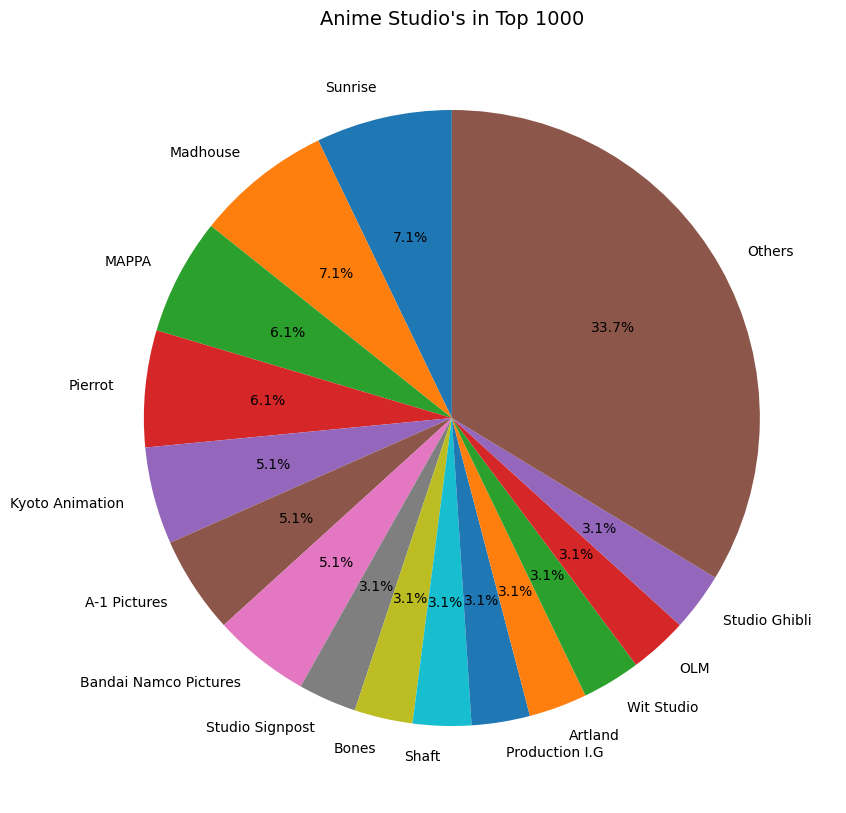

In [8]:
data = top_studios.copy()
# Gộp các studio còn lại vào nhóm "Others"
data['Others'] = ques1_df['Studios'].value_counts().sum() - top_studios.sum()
# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 10))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title("Anime Studio's in Top 1000", fontsize=14)
plt.show()

Nhận xét:
- Biểu đồ trên có thể giúp người xem xác định top 15 studio thành công cùng với tỉ lệ góp mặt các tác phẩm của những studio này trong top 1000 phim tốt nhất. Người xem bước đầu đã có gợi ý để lựa chọn phim dựa trên studio.
- Madhouse và Sunrise là hai studio có số lượng anime nhiều nhất trong top 1000 anime được đánh giá cao nhất, đều chiếm tỉ lệ 7.1%. MAPPA và Pierrot là các studio thành công kế tiếp trong top 4 với tỉ lệ 6.1%.
- Gần 70% số bộ phim được đánh giá cao nhất thuộc về top 15 studio hàng đầu trên tổng số hơn 1000 studio.
- Nhìn chung giữa các studio top đầu không có cách biệt quá lớn về số lượng bộ phim hay được sản xuất.
- Tất cả các xưởng phim hàng đầu trong top 15 đều đến từ Nhật Bản.

**Tiếp theo ta sẽ khám phá thêm về đặc điểm của các studio thành công. Để có cái nhìn tổng quan về hoạt động của các studio thì ta sẽ phân tích dựa trên bộ dữ liệu ban đầu có đầy đủ các anime là studios_explode.**

#### Dạng phim mà các studio trên sản xuất là phim truyền hình, anime dài tập hay movie,...?

Thực hiện thống kê về số lượng anime của mỗi loại (Type) cho từng studio

In [9]:
studios_list = top_studios.index
filtered_data = studios_explode[studios_explode['Studios'].isin(studios_list)]
type_counts = filtered_data.groupby(['Studios', 'Type']).size().reset_index(name='Count')
type_counts

,Studios,Type,Count
0,A-1 Pictures,CM,8
1,A-1 Pictures,Movie,25
2,A-1 Pictures,Music,3
3,A-1 Pictures,ONA,14
4,A-1 Pictures,OVA,18
...,...,...,...
109,Wit Studio,OVA,8
110,Wit Studio,PV,3
111,Wit Studio,Special,4
112,Wit Studio,TV,22


Vẽ biểu đồ phân bố các dạng phim anime theo từng studio

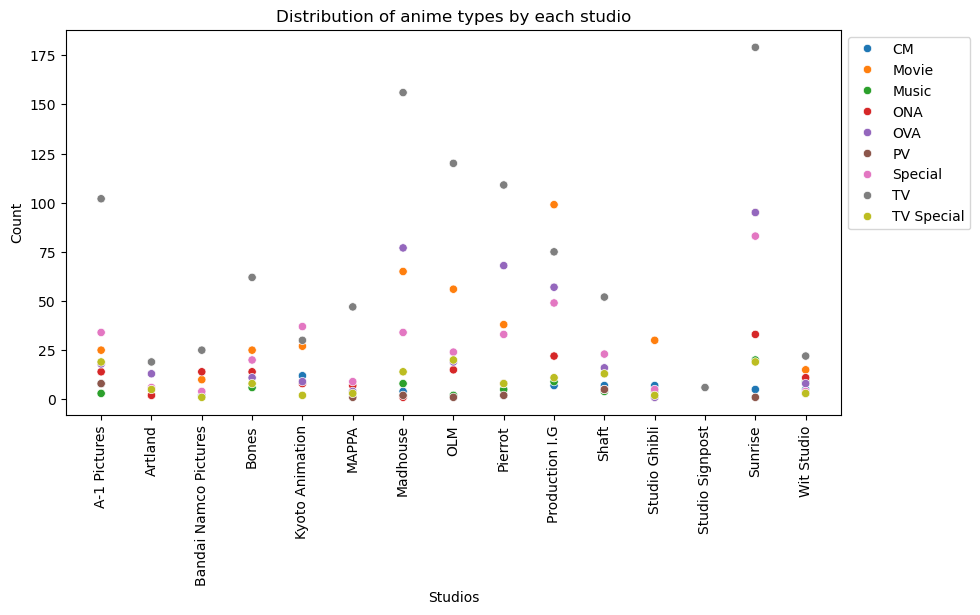

In [10]:
# Vẽ biểu đồ scatterplot
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Studios', y='Count', hue='Type', data=type_counts, ax=ax)
plt.xticks(rotation=90)
plt.title('Distribution of anime types by each studio')
plt.legend(bbox_to_anchor=(1, 1))
# Hiển thị biểu đồ
plt.show()

Nhận xét:
- Hầu hết studio đều sản xuất phim hoạt hình đa dạng, đa thể loại chứ không chỉ tập trung ở một dạng phim nhất định. Riêng Studio Signpost là trường hợp đặc biệt nhất khi chỉ tập trung sản xuất thể loại TV.
- Nổi bật nhất phải kể đến phim truyền hình (TV) là dạng phim được hầu hết các studio tập trung sản xuất nhất. Lí do có thể là vì TV là dạng dễ sản xuất và được yêu thích nhất đối với người xem.
- Tuy nhiên, hai hãng phim có khối lượng sản xuất lớn là Production I.G và Ghibli lại ưu tiên lựa chọn Movie để sản xuất hơn so với TV. Vì vậy, người xem có nhu cầu tìm các bộ phim Movie có thể cân nhắc các phim đến từ hai studio này, sẽ có đa dạng phim để lựa chọn.
- OVA và Movie cũng là 2 dạng phim phổ biến và được sản xuất nhiều sau TV.
- Special và ONA là 2 dạng phim có lượng sản xuất trung bình, trong đó nổi bật có studio Kyoto Animation lựa chọn Special làm ưu tiên sản xuất hàng đầu của mình.
- Music là thể loại được lựa chọn sản xuất ít nhất, tuy nhiên ta có thể thấy một studio có lượng sản xuất Music nhiều hơn hết các studio còn lại là Sunrise. Có thể Sunrise có thế mạnh về chất lượng âm thanh. Ngoài ra Sunrise còn nổi bật ở lượng sản xuất anime OVA và Special so với các studio khác. Có thể thấy studio này có khác biệt khá nhiều về phân bố dạng phim sản xuất so với các studio top đầu còn lại.
- Các studio: Shaft, Artland, Wit Studio, Bandai Namco Pictures cũng sản xuất đa dạng thể loại phim nhưng giữa các dạng lại có số lượng sản xuất khá đồng đều.

Dựa vào dạng phim mà các studio sản xuất nhiều ta có thể đưa ra một số đặc điểm chung của các studio và bổ sung một số kiến thức bên ngoài về các studio này như sau:
- Các studio có số lượng anime TV nhiều nhất là Sunrise, Madhouse và OLM. Đây là các studio lớn và có lịch sử lâu đời trong ngành anime, với nhiều anime nổi tiếng như Dragon Ball, One Piece, Gundam, Code Gea Revolutionary Girl Utena,... Đặc biệt, Sunrise là studio lớn, có lượng sản xuất hàng đầu và cũng sản xuất nhiều Movie và OVA anime nhất.
- Các studio sản xuất nhiều anime Movie là Production I.G và Ghibli. Đây là các studio có kỹ năng vẽ hoạt họa cao và có nhiều bộ phim hoạt hình đoạt giải thưởng quốc tế, như Paprika, Wolf Children, The Girl Who Leapt Through Time, Redline, Ghost in the Shello,...
- Studio sản xuất nhiều anime OVA là Pierrot. Đây là studio có nhiều anime dài tập và có nhiều phần ngoại truyện, như Rurouni Kenshin, Higurashi no Naku Koro ni, Umineko no Naku Korlaye,...
- Các studio MAPPA, WIT Studio và Bandai Namco Pictures sản xuất nhiều anime ONA. Đây là các studio mới và có nhiều anime được phát hành trên các nền tảng trực tuyến, như Netflix, Amazon Prime và Crunchyroll. Một số anime của họ là Yuri!!! on Ice, Inuyashiki, Dororo, Vinland Saga, Attack on Titan, Fate/Zero, Fate/stay night: Unlimited Blade Wo,...
- Các studio Kyoto Animation, Shaft và A-1 Pictures sản xuất khá nhiều anime Special. Đây là các studio có nhiều anime hài hước và lãng mạn, và có nhiều tập đặc biệt để tăng thêm sự gắn kết với khán giả, như K-On!, Clannad, The Melancholy of Haruhi Suzumiya, Monogatari Series, Puella Magi Madoka Magica, Sword Art Online, Fairy ,...

#### Các studio có xu hướng chuyển thể như thế nào?

Thực hiện thống kê về số lượng anime của mỗi Source cho từng studio

In [11]:
source_counts = filtered_data.groupby(['Studios', 'Source']).size().reset_index(name='Count')
source_counts

,Studios,Source,Count
0,A-1 Pictures,4-koma manga,9
1,A-1 Pictures,Game,40
2,A-1 Pictures,Light novel,42
3,A-1 Pictures,Manga,72
4,A-1 Pictures,Mixed media,4
...,...,...,...
142,Wit Studio,Novel,2
143,Wit Studio,Original,32
144,Wit Studio,Other,1
145,Wit Studio,Visual novel,1


Vẽ biểu đồ phân bố các nguồn chuyển thể theo từng studio

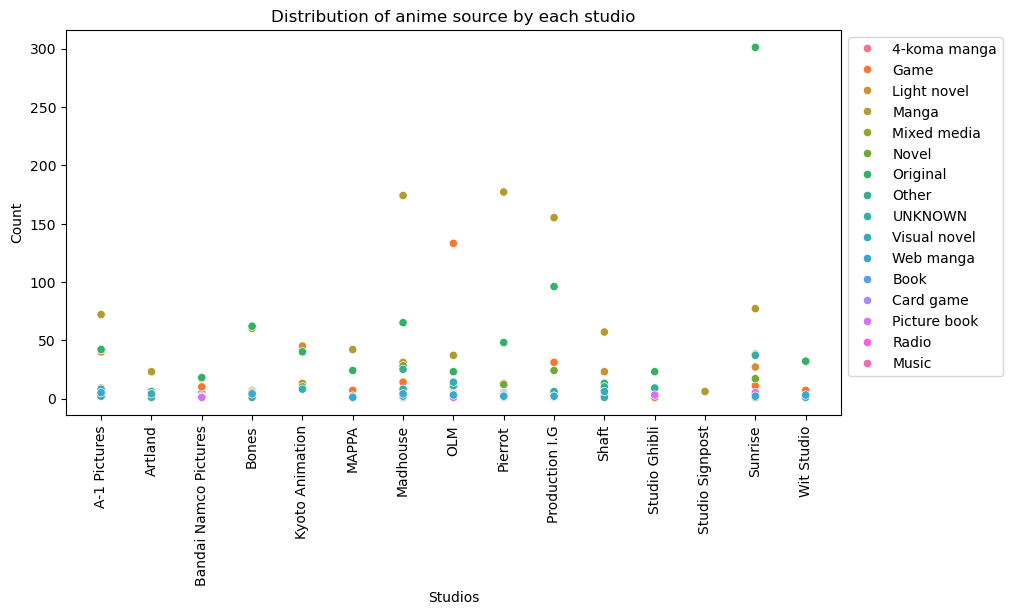

In [12]:
# Vẽ biểu đồ scatterplot
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Studios', y='Count', hue='Source', data=source_counts, ax=ax)
plt.xticks(rotation=90)
plt.title('Distribution of anime source by each studio')
plt.legend(bbox_to_anchor=(1, 1))
# Hiển thị biểu đồ
plt.show()

Nhận xét:
- Hầu hết studio đều có nguồn để sản xuất anime đa dạng. Nhưng Studio Signpost một lần nữa là trường hợp đặc biệt khi chỉ lựa chọn Manga làm nguồn sản xuất.
- Hầu hết các studio đều chọn Manga làm nguồn để sản xuất anime nhiều nhất. Các trường hợp đặc biệt là Sunrise với nguồn sản xuất Original cao vượt trội, còn OLM tập trung nhiều nhất vào nguồn Game.
- Các nguồn được chọn nhiều tiếp theo là Original, Light novel, Visual novel.
- Các nguồn để sản xuất anime còn lại đều được sản xuất ở mức khá thấp so với các nguồn phổ biến, tuy nhiên có số lượng khá đồng đều nhau.
- Các studio lớn như Production I.G, MADHOUSE và Pierrot có số lượng anime chuyển thể nhiều nhất, từ các nguồn đa dạng như manga, light novel, game, visual novel v.v. Điều này cho thấy họ có khả năng thích ứng với nhiều thể loại và phong cách khác nhau, cũng như có mối quan hệ tốt với các nhà xuất bản và nhà phát triển game.
- Các studio nhỏ hơn như Kyoto Animation, Shaft, Bandai Namco Pictures và Wit Studio có số lượng anime chuyển thể ít hơn, nhưng chủ yếu là từ các nguồn riêng biệt như light novel, visual novel, web manga, game v.v. Điều này cho thấy họ có sự chọn lọc và tập trung cao trong việc chuyển thể các tác phẩm có chất lượng và độc đáo, cũng như có phong cách nghệ thuật đặc trưng và nhận dạng.
- Các studio khác như Bones, MAPPA, A-1 Pictures và Sunrise có số lượng anime chuyển thể trung bình, từ các nguồn khác nhau, nhưng có xu hướng nhiều hơn về các thể loại như hành động, phiêu lưu, khoa học viễn tưởng, v.v. Điều này cho thấy họ có kinh nghiệm và năng lực trong việc chuyển thể các tác phẩm có yếu tố kịch tính và hấp dẫn, cũng như có kỹ thuật hoạt họa và hiệu ứng cao.

#### Sự tương quan giữa số lượng và chất lượng

Đầu tiên cần tính tổng số bộ phim mà mỗi studio đã sản xuất.

In [13]:
total_anime = filtered_data['Studios'].value_counts()
print(total_anime)

Sunrise                  530
Madhouse                 361
Production I.G           329
Pierrot                  273
OLM                      259
A-1 Pictures             231
Bones                    146
Shaft                    138
Kyoto Animation          125
MAPPA                     82
Wit Studio                80
Bandai Namco Pictures     56
Studio Ghibli             50
Artland                   47
Studio Signpost            6
Name: Studios, dtype: int64


Tiếp theo, cần tính điểm trung bình các bộ phim của mỗi studio.

In [14]:
filtered_data = filtered_data.dropna(subset=['Score'])
avg_score_by_studio = filtered_data.groupby("Studios")['Score'].mean()
avg_score_by_studio

Studios
A-1 Pictures             7.137749
Artland                  6.712553
Bandai Namco Pictures    7.084464
Bones                    7.293904
Kyoto Animation          7.321280
MAPPA                    7.137805
Madhouse                 6.939335
OLM                      6.649035
Pierrot                  6.751575
Production I.G           7.009422
Shaft                    7.063116
Studio Ghibli            6.912000
Studio Signpost          7.933333
Sunrise                  6.838189
Wit Studio               7.178625
Name: Score, dtype: float64

Cuối cùng, vẽ biểu đồ.

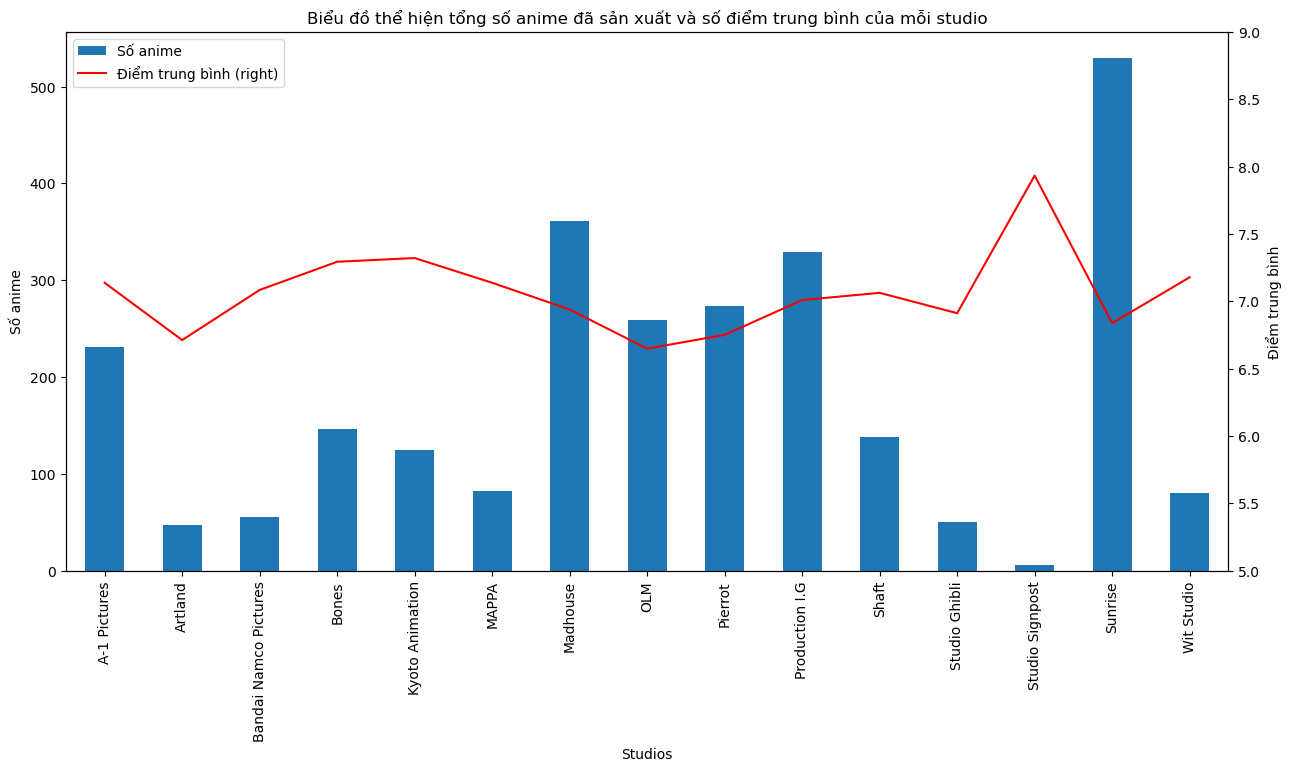

In [15]:
total_anime = total_anime.sort_index()
avg_score_by_studio = avg_score_by_studio.sort_index()
#Vẽ biểu đồ
fig, ax = plt.subplots(figsize = (15,7))

ax1 = total_anime.plot(kind='bar', rot = 90, label = 'Số anime')
ax2 = avg_score_by_studio.plot(secondary_y=True, rot = 90, color = 'r', label = 'Điểm trung bình')
ax2.set_ylim(5, 9)

#Vẽ 2 legend trên cùng 1 bảng
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax.right_ax.get_legend_handles_labels()
handles = h1+h2
labels = l1+l2
ax.legend(handles, labels, loc='upper left')

#Thêm title và xlabel, ylabel

plt.title("Biểu đồ thể hiện tổng số anime đã sản xuất và số điểm trung bình của mỗi studio")
ax1.set_ylabel("Số anime")
ax2.set_ylabel("Điểm trung bình")

plt.show()

Nhận xét:
- Chất lượng sản xuất anime của các studio khá đồng đều, với điểm trung bình đều nằm trong khoảng từ 6.5 đến 8.
- Có thể thấy sự chênh lệch về điểm số là do ảnh hưởng của số lượng sản xuất với xu hướng là: Các studio có số lượng anime sản xuất thấp thì có điểm trung bình cao hơn, còn các studio có số lượng anime sản xuất cao thì sẽ có điểm trung bình thấp hơn.
- Studio Signpost cho thấy sự ấn tượng về chất lượng sản xuất với điểm số cao nhất (7.933).
- Ta cũng thấy sự nổi bật về chất lượng của studio Sunrise khi studio này vẫn giữ được điểm trung bình ở mức cao trong khi cũng có số lượng anime được sản xuất lớn. Sunrise có sự cân bằng giữa số lượng và chất lượng, chất lượng sản phẩm đồng đều và họ có nhiều thể loại và phong cách khác nhau.
- Các studio có điểm trung bình cao nhất là Studio Signpost, Kyoto Animation, Bones,  Wit studio, MAPPA đều có số lượng sản xuất thấp. Điều này cho thấy chiến lược của họ là chọn lọc và tập trung vào các tác phẩm có chất lượng và độc đáo thay vì chú ý đến số lượng.
- Các studio có số lượng anime sản xuất cao như Sunrise, Madhouse, Production I.G, Pierrot, v.v. cho thấy chiến lược của họ là tập trung vào sản xuất các thể loại phổ biến, chú trọng vào lượng khán giả lớn và tăng cường mức độ phổ biến của họ đối với người xem anime.

#### Vẽ boxplot thể hiện điểm trung bình các phim của mỗi studio

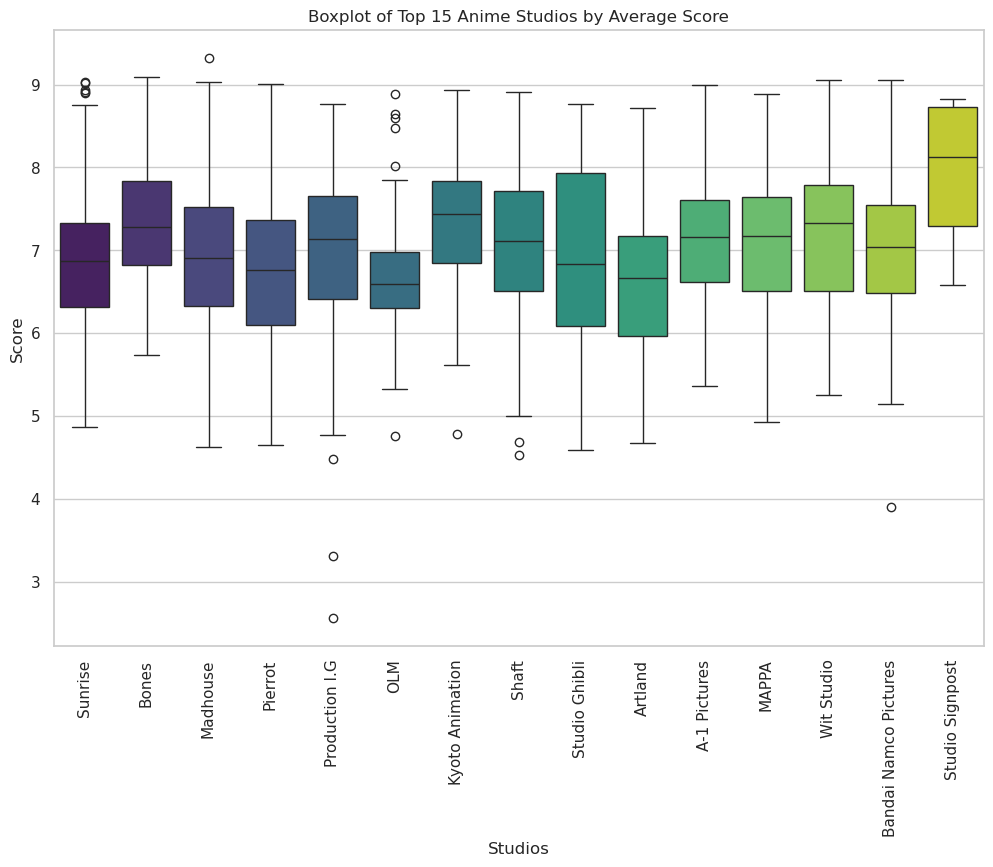

In [16]:
# Create a boxplot using Seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.boxplot(x='Studios', y='Score', data=filtered_data, hue='Studios', palette='viridis', dodge=False, legend=False)
plt.title('Boxplot of Top 15 Anime Studios by Average Score')
plt.xticks(rotation=90)
plt.show()

Nhận xét:
- Biểu đồ này cho ta cái nhìn sâu sắc hơn về chất lượng các tác phẩm của mỗi studio.
- Vì đây là top các studio hàng đầu nên chất lượng sản xuất anime của các studio khá đồng đều, với điểm trung bình nằm trong khoảng từ 6.5 đến 8. Tuy nhiên, cũng có một số outliers, cho thấy có những phim xuất sắc hoặc kém chất lượng.
- Sunrise và Madhouse nổi bật với các tác phẩm có điểm số cao vượt trội (trên 9). OLM cũng nổi bật với nhiều sản phẩm trên 8 điểm.
- Mặt khác, Production I.G, Shaft và Bandai Namco Pictures lại có các phim có chất lượng thụt lùi, có điểm số khá tệ.
- Các studio như Ghibli, Signpost và Wit có phạm vi điểm rộng dù số bộ phim họ sản xuất ở mức thấp, cho thấy sự chênh lệch lớn trong chất lượng sản phẩm của họ.
- Có thể thấy rằng các studio thành công này không sản xuất nhiều tác phẩm nhất hay có mức điểm trung bình cao nhất. Có thể nói rằng chất lượng công việc mà các studio này thực hiện mới khiến họ có được rất nhiều chương trình lọt vào top 1000 với điểm số tốt.